In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from statannotations.Annotator import Annotator
import matplotlib.patheffects as PathEffects
from statsmodels.graphics.mosaicplot import mosaic

## Read weather observation data

In [2]:
station_limbo = pd.read_csv('data/LIMBO.csv')

In [3]:
station_limbo['Report Date / Time'] = pd.to_datetime(station_limbo['Report Date / Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Convert field to datetime type 
station_limbo['Report Date / Time'] = pd.to_datetime(station_limbo['Report Date / Time'])  

In [4]:
station_limbo.index = station_limbo['Report Date / Time']
station_limbo.head()

,Id,Site Id,Longitude,Latitude,Report Date / Time,Air Temperature,Wet Bulb,Dew Point,Concrete Temp.,Grass Temp.,...,v1_Coastal,v1_Flood,v1_Ice,v1_Landslide,v1_Lightning,v1_PoorVisibility,v1_Snow,v1_Wildfire,v1_Wind,v1_Other
Report Date / Time,,,,,,,,,,,,,,,,,,,,,
2023-07-01 00:00:33,﻿20230701jrdbs6azwee67rj4yyb969uz5r,16ef4fbb-3820-e911-9461-0003ff5986c6,-0.0706,51.482,2023-07-01 00:00:33,18.3,NaN,15.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01 00:05:34,2023070197xt3nozwee67rj4yyb969uz5r,16ef4fbb-3820-e911-9461-0003ff5986c6,-0.0706,51.482,2023-07-01 00:05:34,18.3,NaN,15.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01 00:10:35,20230701ihcdj5azwce67rj4yyb969uz5r,16ef4fbb-3820-e911-9461-0003ff5986c6,-0.0706,51.482,2023-07-01 00:10:35,18.3,NaN,15.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01 00:15:36,20230701ct44hnezwoe67rj4yyb969uz5r,16ef4fbb-3820-e911-9461-0003ff5986c6,-0.0706,51.482,2023-07-01 00:15:36,18.3,NaN,15.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-01 00:20:37,20230701d8144fozwwe67rj4yyb969uz5r,16ef4fbb-3820-e911-9461-0003ff5986c6,-0.0706,51.482,2023-07-01 00:20:37,18.3,NaN,15.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Prepare data

### Sensor id 

In [5]:
# read sensor id
sensor_id = pd.read_csv('data/SensorID_EPC_Survey_Open_Data.csv')
sensor_id.head()

,ID,IMD Quintile,Self-report Housing Condition,Housing Type,Tenures,Current EPC Rating,Recording Start Time (Participant),Recording End Time (Participant),Battery Charging Start Time,Battery Charging End Time,Unnamed: 10
0,BL007-02,2,Not new but in reasonable condition,Terraced house,Homeowner with mortgage,D,04/08/2023 19:05,NaN,04/08/2023 18:01,13/09/2023 15:49,NaN
1,BL007-04,1,New and/or in good condition,"Flat/apartment (high-rise on a low floor, or l...",Renting from a local authority/council,B,28/07/2023 19:42,15/09/2023 15:07,28/07/2023 18:42,15/09/2023 15:07,NaN
2,BL007-07,1,Not new but in reasonable condition,Terraced house,Renting from a housing association/housing co-...,C,04/08/2023 19:27,14/09/2023 23:00,04/08/2023 18:35,14/09/2023 14:54,NaN
3,BL007-09,1,Not new but in reasonable condition,Duplex Terraced maisonette on top of a ro,Homeowner with mortgage,C,04/08/2023 17:18,13/09/2023 19:30,04/08/2023 16:16,13/09/2023 20:55,NaN
4,BL007-13,2,New and/or in good condition,"Flat/apartment (high-rise on a low floor, or l...",Homeowner with mortgage,B,04/08/2023 17:36,19/09/2023 15:23,04/08/2023 16:36,19/09/2023 14:17,NaN


In [6]:
# Convert field to datetime type 
sensor_id['Battery Charging Start Time'] = pd.to_datetime(sensor_id['Battery Charging Start Time'], format="%d/%m/%Y %H:%M")  
sensor_id['Battery Charging End Time'] = pd.to_datetime(sensor_id['Battery Charging End Time'], format="%d/%m/%Y %H:%M")  

sensor_id['Recording Start Time (Participant)'] = pd.to_datetime(sensor_id['Recording Start Time (Participant) '], format="%d/%m/%Y %H:%M")  
sensor_id['Recording End Time (Participant)'] = pd.to_datetime(sensor_id['Recording End Time (Participant) '], format="%d/%m/%Y %H:%M")

In [7]:
# Set ID as index
sensor_id = sensor_id.set_index('ID')

In [8]:
# Define final start datetime and end datetime
# Delay 1 hour to allow the sensor settled in the indoor condition and improve the accuracy of indoor temperature measurement
sensor_id[['start_datetime']] = sensor_id[['Battery Charging Start Time']] + pd.Timedelta(hours=1)
sensor_id[['end_datetime']] = sensor_id[['Battery Charging End Time']]

sensor_id.start_datetime.fillna(sensor_id['Recording Start Time (Participant)'], inplace=True)
sensor_id.end_datetime.fillna(sensor_id['Recording End Time (Participant)'], inplace=True)

### Sensors measurement data

In [9]:
# read and filter sensors data
sensors_data_path = 'data/Smart_Citizen_Data_Concat/'

sensors_data = {}

for data_path in os.listdir(sensors_data_path):
    df = pd.read_csv(sensors_data_path+data_path)

    df['TIME'] = pd.to_datetime(df['TIME'])  
    df['TIME'] = df['TIME'].dt.tz_convert(None)

    start_date_value = sensor_id.loc[data_path[:-4]]['start_datetime']
    end_date_value = sensor_id.loc[data_path[:-4]]['end_datetime']

    df = df[(df['TIME'] >= start_date_value) & (df['TIME'] <= end_date_value)]
    df = df.set_index('TIME')

    sensors_data[data_path[:-4]] = df

### Survey data

In [10]:
# Read survey data
survey = pd.read_excel('data/TBIJ-Survey1.xlsx',sheet_name='Heatwave',header=2)
survey = survey.set_index('ID')

### Household temperature statistics

In [11]:
household_temp={}

for index in sensors_data:
    df = sensors_data[index]

    household_temp[index] = [df['TEMP'].mean(), df['TEMP'].max(), df['TEMP'].min(), df['TEMP'].var(), df['TEMP'].std()]

temp_all = pd.DataFrame.from_dict(household_temp,orient='index',columns=['indoor_mean','indoor_max','indoor_min', 'indoor_var', 'indoor_std'])

### Join datasets

In [12]:
# join sensor statistics (at household level) with EPC and survey
temp_join = temp_all.join(sensor_id,how='left')
temp_join = temp_join.join(survey[['communal_heating']],how='left')

## Descriptive analysis

### Basic data info

In [13]:
temp_join.shape

(40, 20)

In [14]:
temp_join.dtypes

indoor_mean                                   float64
indoor_max                                    float64
indoor_min                                    float64
indoor_var                                    float64
indoor_std                                    float64
IMD Quintile                                    int64
Self-report Housing Condition                  object
Housing Type                                   object
Tenures                                        object
Current EPC Rating                             object
Recording Start Time (Participant)             object
Recording End Time (Participant)               object
Battery Charging Start Time            datetime64[ns]
Battery Charging End Time              datetime64[ns]
Unnamed: 10                                   float64
Recording Start Time (Participant)     datetime64[ns]
Recording End Time (Participant)       datetime64[ns]
start_datetime                         datetime64[ns]
end_datetime                

In [15]:
temp_join.describe()

,indoor_mean,indoor_max,indoor_min,indoor_var,indoor_std,IMD Quintile,Unnamed: 10
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,0.0
mean,23.970250,29.097250,20.087750,3.349421,1.739934,1.575000,NaN
std,1.268351,3.433818,1.645249,2.860963,0.574726,0.500641,NaN
min,21.726997,24.270000,16.930000,0.631704,0.794798,1.000000,NaN
25%,23.138955,27.217500,18.902500,1.896696,1.377152,1.000000,NaN
50%,23.832044,28.945000,19.990000,2.973508,1.724336,2.000000,NaN
75%,24.771630,30.165000,21.222500,3.451557,1.857834,2.000000,NaN
max,27.098864,47.400000,24.230000,19.082654,4.368370,2.000000,NaN


In [16]:
temp_join['Current EPC Rating '].value_counts()

B    12
C     9
D     8
E     4
Name: Current EPC Rating , dtype: int64

In [17]:
temp_join['communal_heating'].value_counts()

No, I don't have communal heating                             15
Yes, I'm on communal heating but it turns off in summer        5
Yes, I'm on communal heating and yes it stays on in summer     5
Name: communal_heating, dtype: int64

### Info on EPC and communal heating 

In [18]:
temp_join.groupby('Current EPC Rating ')['communal_heating'].value_counts()

Current EPC Rating   communal_heating                                          
B                    No, I don't have communal heating                             5
                     Yes, I'm on communal heating and yes it stays on in summer    2
                     Yes, I'm on communal heating but it turns off in summer       2
C                    No, I don't have communal heating                             3
                     Yes, I'm on communal heating but it turns off in summer       1
D                    No, I don't have communal heating                             3
                     Yes, I'm on communal heating and yes it stays on in summer    3
E                    No, I don't have communal heating                             2
                     Yes, I'm on communal heating but it turns off in summer       1
Name: communal_heating, dtype: int64

In [19]:
# clean communal_heating column
temp_join['communal_heating'] = temp_join['communal_heating'].astype('category')

temp_join['communal_heating'] = temp_join['communal_heating'].apply(lambda x: 'No' if x=='No, I don\'t have communal heating' else
                                    ('Yes - summer on' if x=='Yes, I\'m on communal heating and yes it stays on in summer' else
                                    'Yes - summer off' if x=='Yes, I\'m on communal heating but it turns off in summer' else np.nan))

In [20]:
# sort dataframe
temp_join = temp_join.sort_values(by=['Current EPC Rating ','communal_heating'])

In [21]:
# set palette
palette = sns.color_palette("rocket")
palette.reverse()

c:\Users\jobbo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


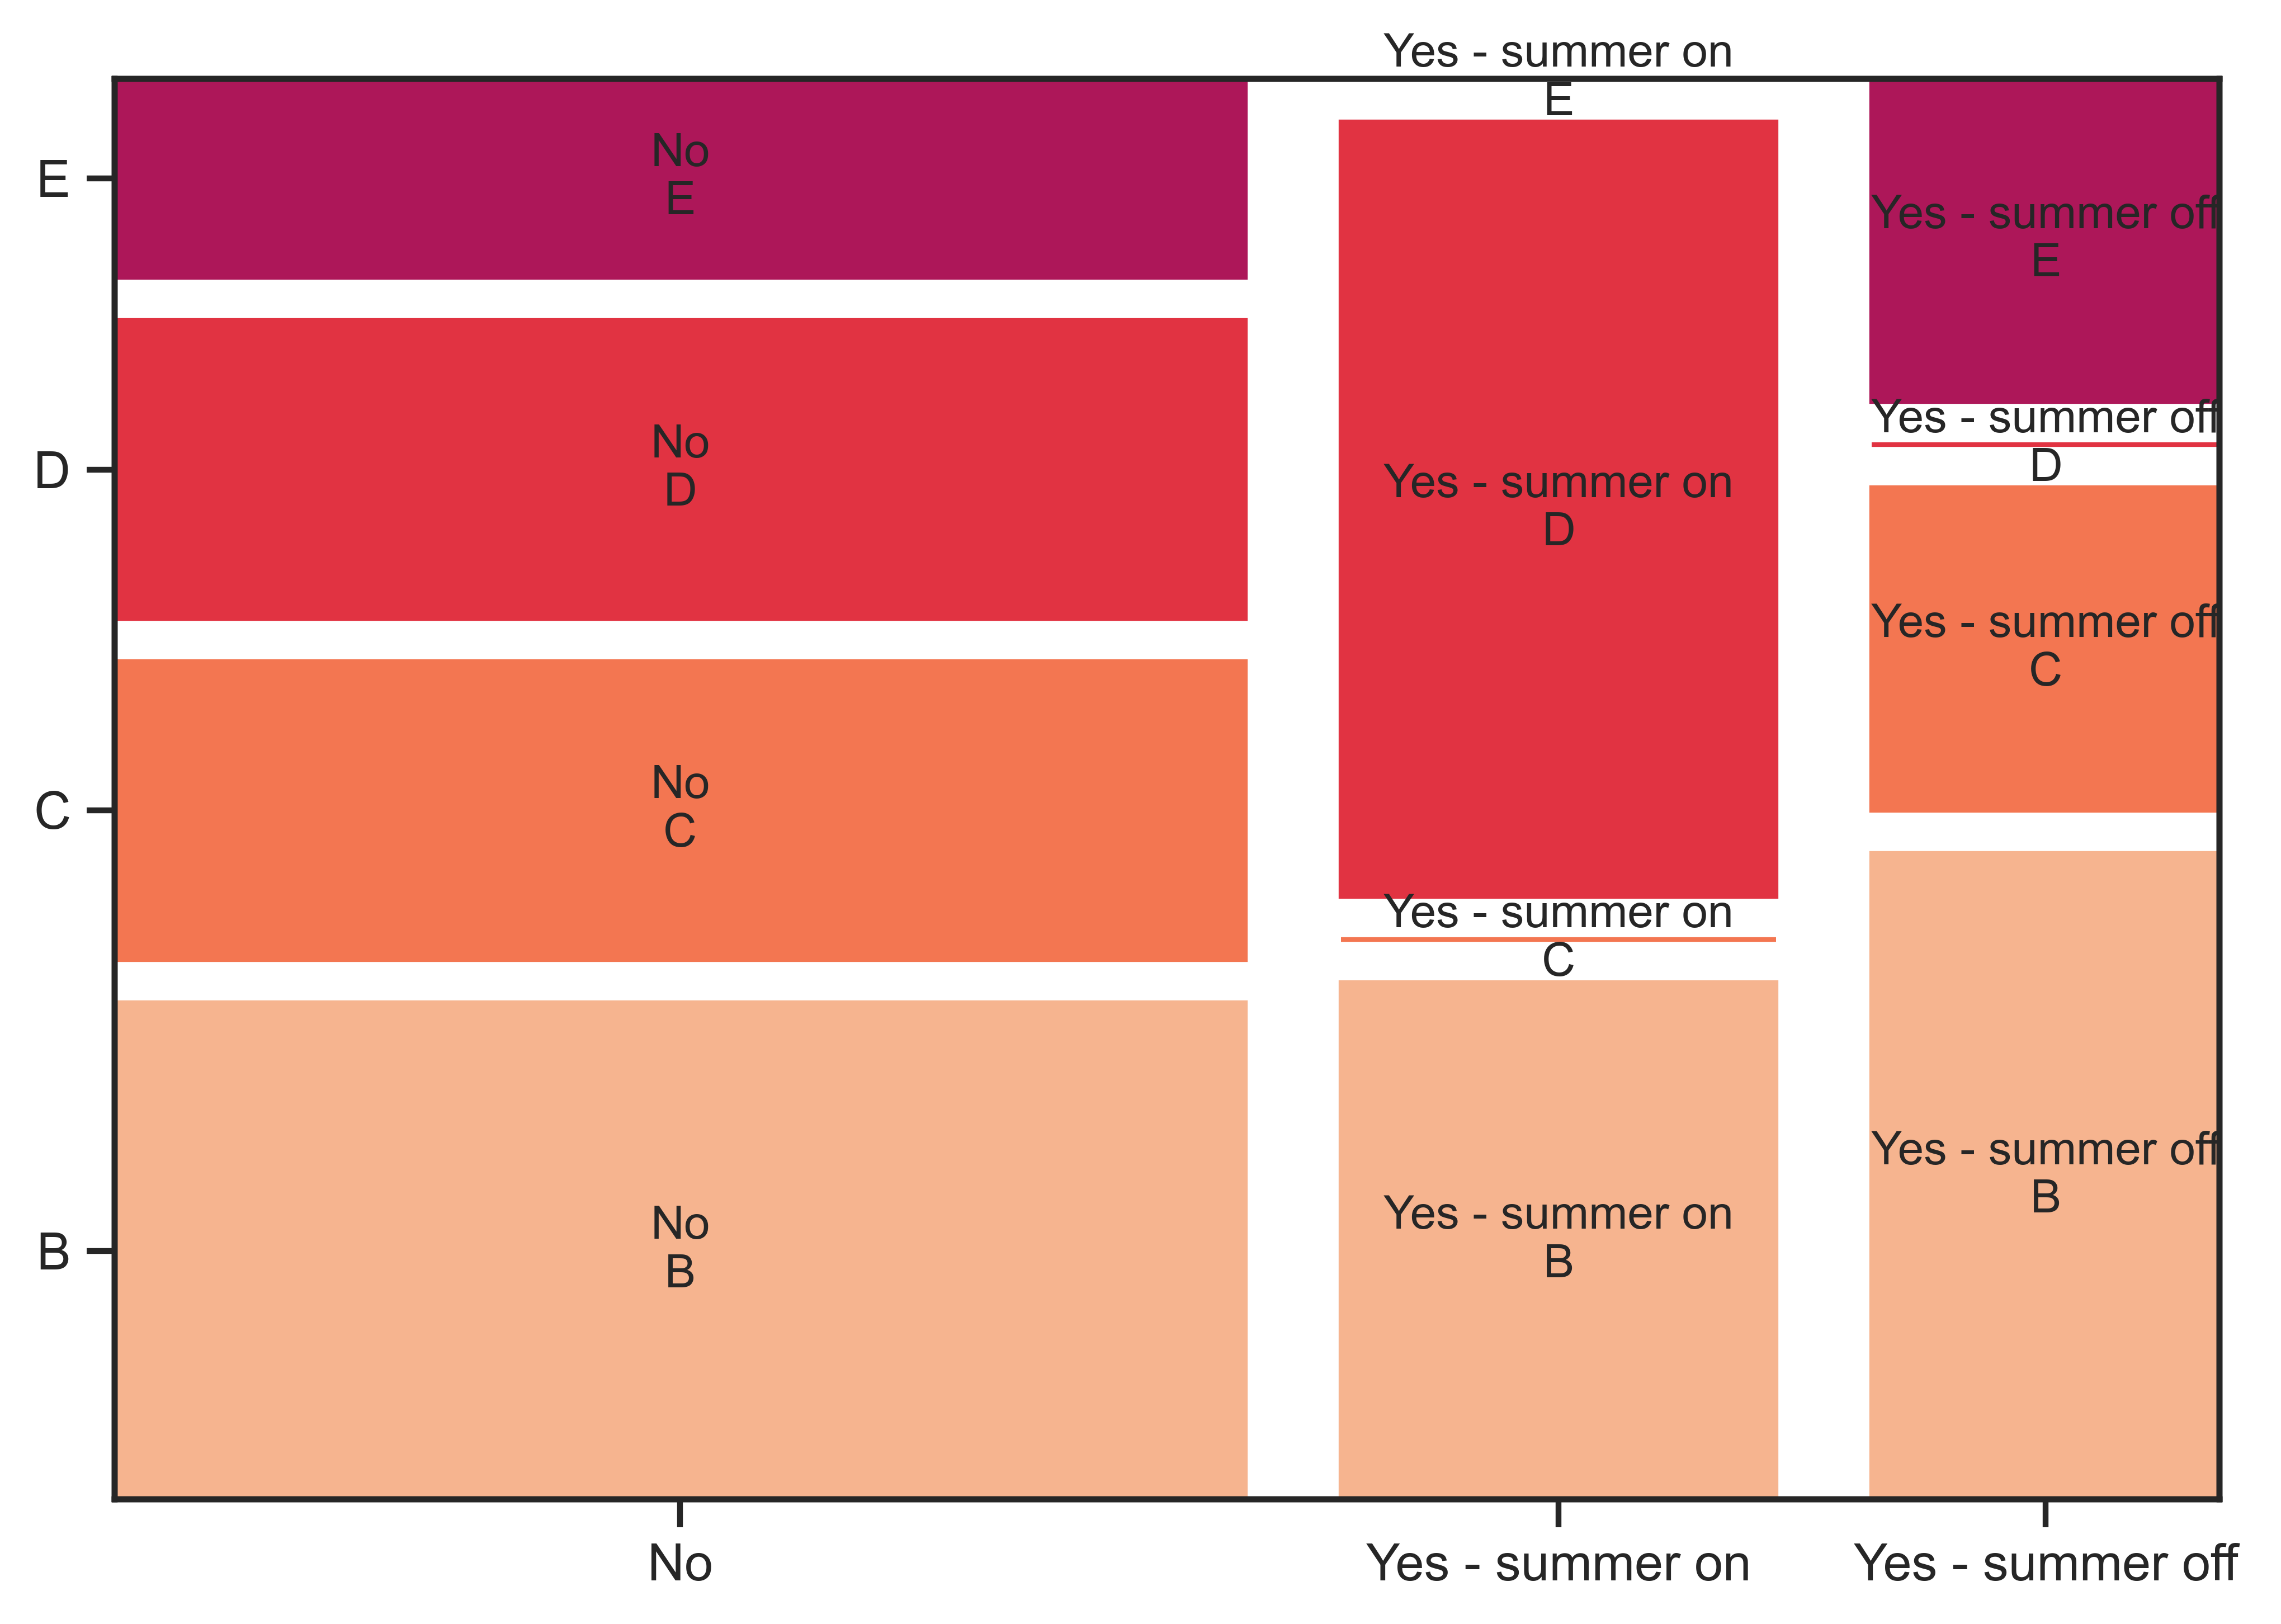

In [29]:
# mosaic plot for interaction of EPC and communal heating
sns.set_theme(style='white')
plt.rcParams["figure.figsize"] = [7, 5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 600

def props(key):
    return {'color': palette[0] if 'B' in key else palette[1] if 'C' in key else palette[2] if 'D' in key else
            palette[3]}

mosaic(temp_join, ['communal_heating','Current EPC Rating '], properties=props, gap=0.05)

plt.show()

## ANOVA and two sample t-tests

### Energy efficiency

In [23]:
for var in ['indoor_mean','indoor_max','indoor_min','indoor_var','indoor_std']:
    f_score = f_oneway(temp_join[temp_join['Current EPC Rating ']=='B'][var],temp_join[temp_join['Current EPC Rating ']=='C'][var],
                   temp_join[temp_join['Current EPC Rating ']=='D'][var],temp_join[temp_join['Current EPC Rating ']=='E'][var])
    print('f score of {} among energy efficiency groups is {}'.format(var,f_score))

f score of indoor_mean among energy efficiency groups is F_onewayResult(statistic=0.1992839314767218, pvalue=0.8960169242821967)
f score of indoor_max among energy efficiency groups is F_onewayResult(statistic=2.093859151110688, pvalue=0.12276839591763096)
f score of indoor_min among energy efficiency groups is F_onewayResult(statistic=3.169195046681747, pvalue=0.03913507631445047)
f score of indoor_var among energy efficiency groups is F_onewayResult(statistic=6.42437273633586, pvalue=0.0018011577960122698)
f score of indoor_std among energy efficiency groups is F_onewayResult(statistic=4.638048677763769, pvalue=0.009086241263271691)


In [24]:
for var in ['indoor_mean','indoor_max','indoor_min','indoor_var', 'indoor_std']:
    print(var)
    t, p = stats.ttest_ind(temp_join[temp_join['Current EPC Rating ']=='B'][var],temp_join[temp_join['Current EPC Rating ']=='C'][var])
    print('B and C is {},{}'.format(t,p))
    t, p = stats.ttest_ind(temp_join[temp_join['Current EPC Rating ']=='B'][var],temp_join[temp_join['Current EPC Rating ']=='D'][var])
    print('B and D is {},{}'.format(t,p))
    t, p = stats.ttest_ind(temp_join[temp_join['Current EPC Rating ']=='B'][var],temp_join[temp_join['Current EPC Rating ']=='E'][var])
    print('B and E is {},{}'.format(t,p))
    t, p = stats.ttest_ind(temp_join[temp_join['Current EPC Rating ']=='C'][var],temp_join[temp_join['Current EPC Rating ']=='D'][var])
    print('C and D is {},{}'.format(t,p))
    t, p = stats.ttest_ind(temp_join[temp_join['Current EPC Rating ']=='C'][var],temp_join[temp_join['Current EPC Rating ']=='E'][var])
    print('C and E is {},{}'.format(t,p))
    t, p = stats.ttest_ind(temp_join[temp_join['Current EPC Rating ']=='D'][var],temp_join[temp_join['Current EPC Rating ']=='E'][var])
    print('D and E is {},{}'.format(t,p))

indoor_mean
B and C is -0.29124633067203776,0.7740186169802904
B and D is -0.6489615648757666,0.5245576975564825
B and E is 0.34009597694685,0.7388330867114938
C and D is -0.17573303959221637,0.8628540697022729
C and E is 0.43870177002222066,0.6693695992539916
D and E is 1.4396526047810057,0.18052598018528343
indoor_max
B and C is -0.7234166009336723,0.47823636718384166
B and D is -1.1741189678641215,0.25564834749138987
B and E is -3.0032225736003704,0.009490695445608559
C and D is -0.2648697708752301,0.7947149201615238
C and E is -1.5897286794792473,0.14020326697482016
D and E is -1.700594433990322,0.11985489324277887
indoor_min
B and C is -1.4801495508119802,0.15522487938136353
B and D is -1.546494218191663,0.13938619445817607
B and E is 1.8498317074338269,0.08555721879222448
C and D is 0.2092636294374515,0.8370578964036777
C and E is 2.3733702930766682,0.03693129611338723
D and E is 3.6776782002737995,0.004262694787445819
indoor_var
B and C is -1.1020697184329973,0.2841964025901719


### Communal heating

In [25]:
for var in ['indoor_mean','indoor_max','indoor_min','indoor_var']:
    f_score = f_oneway(temp_join[temp_join['communal_heating']=='No'][var],
                                 temp_join[temp_join['communal_heating']=='Yes - summer off'][var],
                   temp_join[temp_join['communal_heating']=='Yes - summer on'][var])
    print('f score of {} among communal heating groups is {}'.format(var,f_score))

f score of indoor_mean among communal heating groups is F_onewayResult(statistic=2.9377509470010015, pvalue=0.07399456786630249)
f score of indoor_max among communal heating groups is F_onewayResult(statistic=0.30574899601015487, pvalue=0.7396509251922141)
f score of indoor_min among communal heating groups is F_onewayResult(statistic=0.5008285088885714, pvalue=0.6127723106811208)
f score of indoor_var among communal heating groups is F_onewayResult(statistic=2.5402850169146496, pvalue=0.10172171393451651)


In [26]:
for var in ['indoor_mean','indoor_max','indoor_min','indoor_var','indoor_std']:
    print(var)
    t, p = stats.ttest_ind(temp_join[temp_join['communal_heating']=='No'][var],
                           temp_join[temp_join['communal_heating']=='Yes - summer on'][var])
    print('No and Summer on is {}, {}'.format(t,p))

    t, p = stats.ttest_ind(temp_join[temp_join['communal_heating']=='No'][var],
                           temp_join[temp_join['communal_heating']=='Yes - summer off'][var])
    print('No and Summer off is {}, {}'.format(t,p))

    t, p = stats.ttest_ind(temp_join[temp_join['communal_heating']=='Yes - summer on'][var],
                           temp_join[temp_join['communal_heating']=='Yes - summer off'][var])
    print('Summer on and Summer off is {}, {}'.format(t,p))

indoor_mean
No and Summer on is -2.809496343663726, 0.011598196983821238
No and Summer off is -1.2824156259569073, 0.21596691083508365
Summer on and Summer off is 0.6141168919023319, 0.5561949593620126
indoor_max
No and Summer on is 0.28631801620359887, 0.7779038786683647
No and Summer off is -0.6299983453516539, 0.5366118408309797
Summer on and Summer off is -0.7390150160732967, 0.48101579861997357
indoor_min
No and Summer on is -1.220933931813419, 0.2378634886679426
No and Summer off is -0.37186911369367576, 0.7143319159798829
Summer on and Summer off is 0.3863654076893738, 0.7092991936693045
indoor_var
No and Summer on is 2.1627554989088, 0.04426566519955125
No and Summer off is -0.34285177904787134, 0.735681372183758
Summer on and Summer off is -2.0605833414526384, 0.07329355580202257
indoor_std
No and Summer on is 2.2718805291374644, 0.03559321790525926
No and Summer off is -0.3723592919848439, 0.7139732846717834
Summer on and Summer off is -2.32173900274981, 0.04878680675140018


### Boxplots for temperature distribution

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

B vs. E: t-test independent samples, P_val:9.491e-03 t=-3.003e+00


(array([0, 1, 2, 3]),
 [Text(0, 0, 'B'), Text(1, 0, 'C'), Text(2, 0, 'D'), Text(3, 0, 'E')])

c:\Users\jobbo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


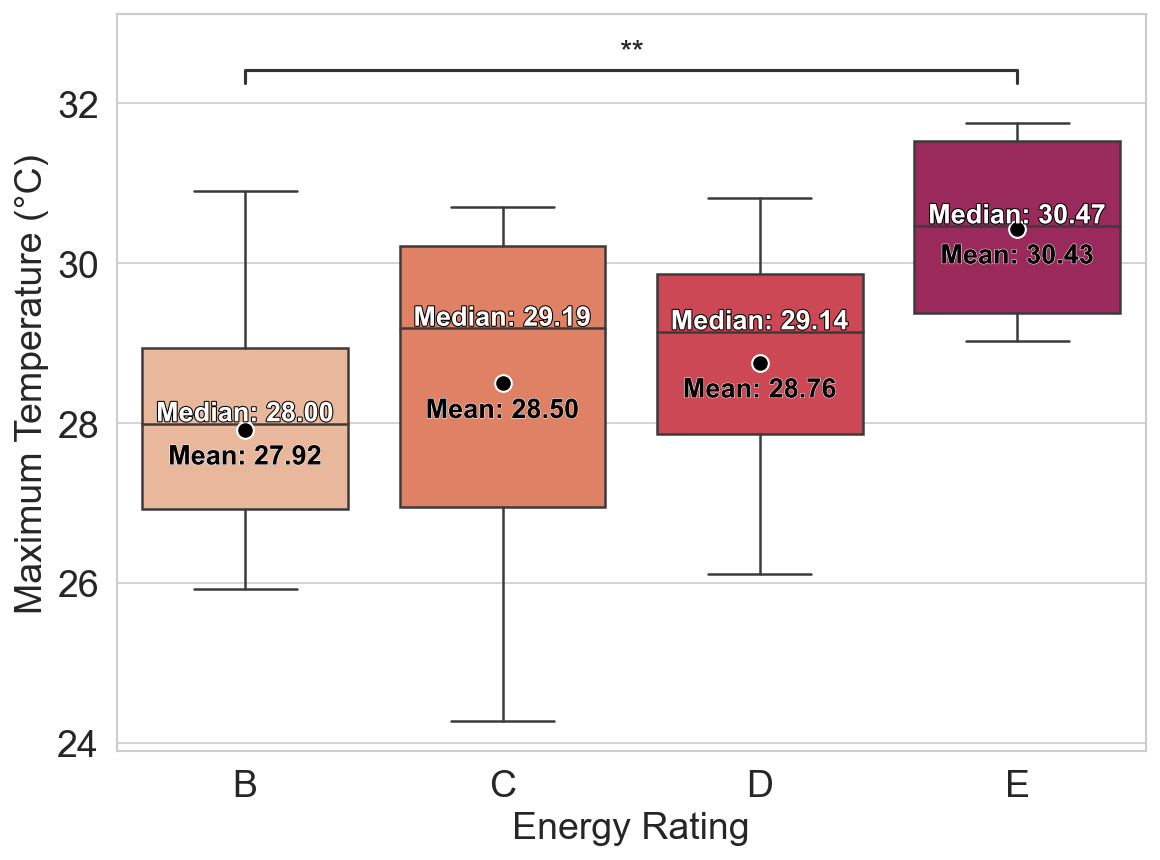

In [31]:
# Box plot for energy efficiency
var='indoor_max'

fig, ax = plt.subplots(figsize=(8, 6),dpi=150)

sns.set_theme(style='whitegrid')
sns.set_context("paper", font_scale=1.6) 

box_plot=sns.boxplot(data=temp_join, x='Current EPC Rating ',y=var, order=['B','C','D','E'], palette=palette ,ax=ax,showmeans=True,
                     meanprops={'marker':'o',
                       'markerfacecolor':'black', 
                       'markeredgecolor':'white',
                       'markersize':'8'},zorder=2)

fig.tight_layout()

# annotate mean
means = temp_join.groupby(['Current EPC Rating '])[var].mean()
vertical_offset = temp_join[var].mean() * 0.015 # offset from median for display

for xtick in box_plot.get_xticks():
    txt=box_plot.text(xtick,means[xtick] - vertical_offset,'Mean: {:.2f}'.format(means[xtick]), 
            horizontalalignment='center',size=13,color='black',weight='semibold',zorder=3)
    txt.set_path_effects([PathEffects.withStroke(linewidth=.5, foreground='w')])

# annotate median
medians = temp_join.groupby(['Current EPC Rating '])[var].median()
vertical_offset = temp_join[var].median() * 0.001 # offset from median for display

for xtick in box_plot.get_xticks():
    txt = box_plot.text(xtick,medians[xtick] + vertical_offset,'Median: {:.2f}'.format(medians[xtick]), 
            horizontalalignment='center',size=13,color='white',weight='semibold',zorder=4)
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='black')])

annot = Annotator(ax, [("B", "C"), ("B", "D"), ("B", "E"),("C", "D"),("C", "E"),("D", "E")], 
                  data=temp_join, x='Current EPC Rating ', y=var, order=['B','C','D','E'])
annot.configure(test='t-test_ind', text_format='star', comparisons_correction=None, loc='inside', verbose=2,
                hide_non_significant=True)
annot.apply_test()
ax, test_results = annot.annotate()

ax.set_xlabel('Energy Rating',fontsize=18)
ax.set_ylabel('{} (°C)'.format('Maximum Temperature'),fontsize=18)
ax.tick_params(axis='y',labelsize=18)
ax.tick_params(axis='x',labelsize=18)

plt.xticks(fontsize=18)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No vs. Yes - summer on: t-test independent samples, P_val:1.160e-02 t=-2.809e+00


(array([0, 1, 2]),
 [Text(0, 0, 'No'),
  Text(1, 0, 'Yes - summer on'),
  Text(2, 0, 'Yes - summer off')])

c:\Users\jobbo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


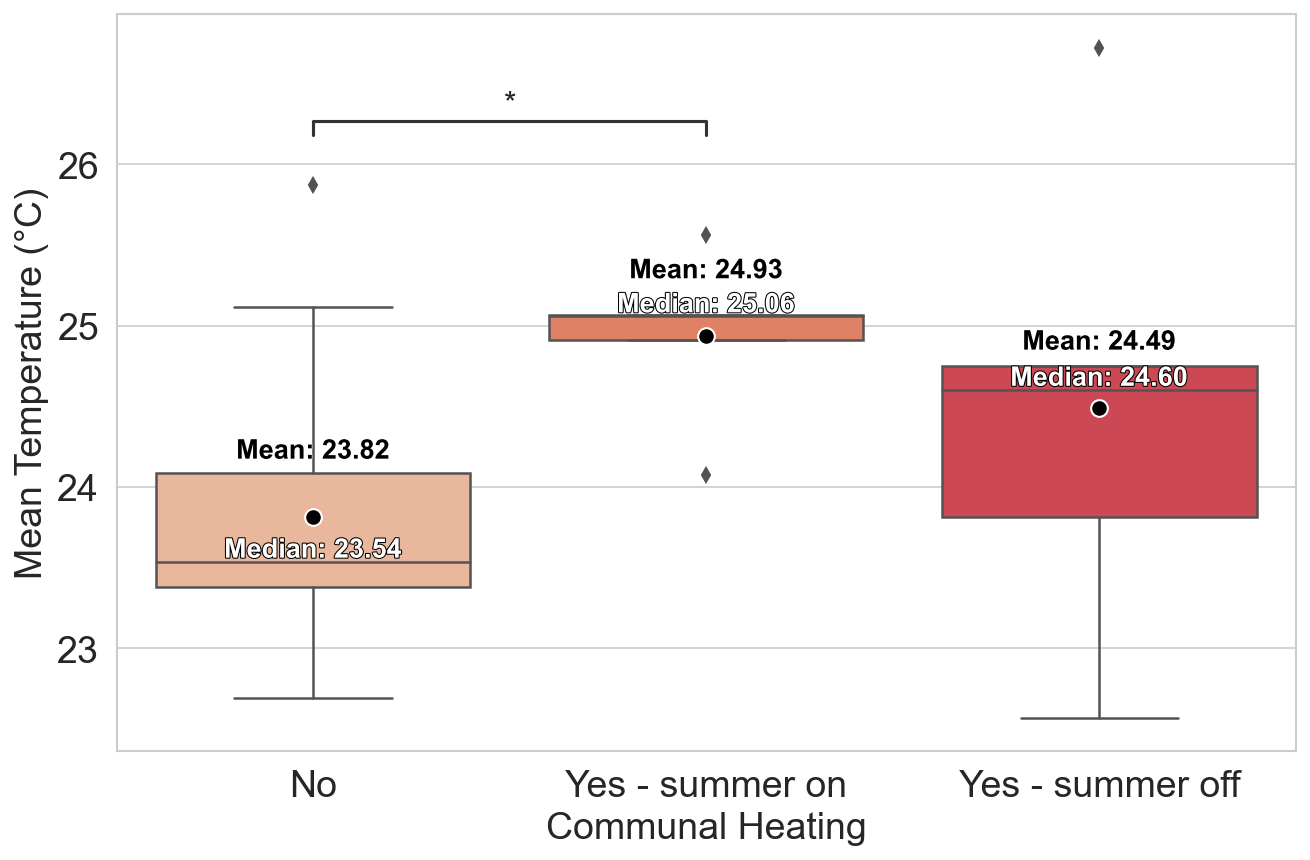

In [28]:
# Box plot for communal heating
var='indoor_mean'
var_name = 'Mean Temperature'

col_no = 'No'
col_summeron ='Yes - summer on'
col_summeroff = 'Yes - summer off'

fig, ax = plt.subplots(figsize=(9, 6),dpi=150)

sns.set_theme(style='whitegrid')
sns.set_context("paper", font_scale=1.6) 

box_plot=sns.boxplot(data=temp_join, x='communal_heating',y=var, order=[col_no, col_summeron,col_summeroff], palette=palette ,ax=ax,showmeans=True,
                     meanprops={'marker':'o',
                       'markerfacecolor':'black', 
                       'markeredgecolor':'white',
                       'markersize':'8'},zorder=2)

fig.tight_layout()

# annotate mean
means = temp_join.groupby(['communal_heating'])[var].mean()
vertical_offset = temp_join[var].mean() * 0.015 # offset from median for display

for xtick in box_plot.get_xticks():
    txt = box_plot.text(xtick,means[xtick] + vertical_offset,'Mean: {:.2f}'.format(means[xtick]), 
            horizontalalignment='center',size=13,color='black',weight='semibold',zorder=3)
    txt.set_path_effects([PathEffects.withStroke(linewidth=.5, foreground='w')])

# annotate median
medians = temp_join.groupby(['communal_heating'])[var].median()
vertical_offset = temp_join[var].median() * 0.001 # offset from median for display

for xtick in box_plot.get_xticks():
    txt = box_plot.text(xtick,medians[xtick] + vertical_offset,'Median: {:.2f}'.format(medians[xtick]), 
            horizontalalignment='center',size=13,color='w',weight='semibold',zorder=4)
    txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='black')])

annot = Annotator(ax, [(col_no, col_summeron), (col_no, col_summeroff), (col_summeron, col_summeroff)], 
                  data=temp_join, x='communal_heating', y=var, order=[col_no, col_summeron,col_summeroff])
annot.configure(test='t-test_ind', text_format='star', comparisons_correction=None, loc='inside', verbose=2,
                hide_non_significant=True)
annot.apply_test()
ax, test_results = annot.annotate()

ax.set_xlabel('Communal Heating',fontsize=18)
ax.set_ylabel('{} (°C)'.format(var_name),fontsize=18)
ax.tick_params(axis='y',labelsize=18)
ax.tick_params(axis='x',labelsize=18)

ax.set_xticklabels(labels=['No','Yes - summer on','Yes - summer off'])

plt.xticks(fontsize=18)